
# <span style="color:rgb(213,80,0)">Segundo parcial semestre 2025\-2</span>

Barajas Gaete Rodrigo Ainar


López González Javier


Rodriguez Rinconcillo Diego


Vélez Gómez Sergio Andrés

## Resumen

**Introducción:**


En esta primera sección se presenta una breve exposición de los motivos que dieron origen a este documento, así como algunas consideraciones básicas para el desarrollo posterior del reporte.


**Descripción del problema:**


Tomando en cuenta la hipótesis propuesta, el problema se plantea como la necesidad de comprobar que una trayectoria propuesta es viable para un robot tipo SCARA, permitiéndole realizar el movimiento esperado mientras mantiene un índice de manipulabilidad dentro del rango establecido como objetivo.


**Propuesta de solución:**


Con el propósito de obtener una gráfica que permita visualizar el comportamiento del índice de manipulabilidad a lo largo de una trayectoria, se selecciona una curva de perfil quíntico (suavizada mediante interpolación) con una deformación senoidal transversal. Bajo esta propuesta, se plantea que, mediante herramientas de simulación como MATLAB y Gazebo, será posible obtener la información deseada.


**Experimentos o simulaciones:**


Partiendo del planteamiento del modelo cinemático del robot y de una solución de cinemática inversa que permita obtener los ángulos entre cada eslabón respecto a un sistema de referencia tomado como origen {0}, es posible definir parámetros dimensionales del robot y la trayectoria a seguir, con el fin de realizar las simulaciones pertinentes tanto en el entorno de modelado (MATLAB) como en el de visualización (Gazebo).


**Resultados:**


Los resultados obtenidos a través del modelado se presentan en forma de gráficas, las cuales permiten afirmar que ninguna de las articulaciones experimenta variaciones súbitas en su posición. Durante la trayectoria, se registraron velocidades bajas en la mayoría de los eslabones, aunque se observaron aceleraciones elevadas. Asimismo, se comprobó que el índice de manipulabilidad se mantuvo dentro del rango objetivo de manera satisfactoria. En cuanto a la simulación realizada en Gazebo, se verificó que la trayectoria es viable bajo las condiciones establecidas para el robot.


**Conclusiones:**


Finalmente, se presentan las conclusiones individuales de cada integrante del equipo.

## Funciones

In [1]:
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Introducción

Este reporte presenta los puntos solicitados como parte del segundo examen parcial de la materia de Robótica, impartida en la Facultad de Ingeniería de la UNAM. Se utilizó la inteligencia artificial Gemini únicamente para la revisión de ortografía y redacción \[1\].


Para la generación de los modelos utilizados en este documento, se consideró un robot tipo SCARA y una trayectoria curva con perfil quíntico y deformación senoidal transversal. Como herramienta de simulación se utilizó MATLAB, debido a su capacidad para modelar sistemas y la facilidad que ofrece para exportar el documento a Jupyter, cumpliendo así con los requisitos de entrega. Además, se empleó Gazebo con el fin de obtener una prueba visual tanto de las propuestas desarrolladas como de las habilidades adquiridas por los estudiantes durante el curso.

### Hipótesis

Existe una trayectoria en el espacio de trabajo del robot SCARA que permite trasladarse desde un punto $P_1$ hasta un punto $P_2$ , garantizando que el robot mantenga su capacidad de manipular un objeto de manera adecuada a lo largo de dicho recorrido.

### Objetivo

Diseñar una trayectoria que permita a un robot SCARA mover un objeto de un punto $P_1$ a un punto $P_2$ , manteniendo su índice de manipulabilidad $W$ dentro de un rango $0.1\le W\le 1$ .

### Metas
-  Modelo cinemático directo e inverso del robot scara.
-  El cálculo del índice de manipulabilidad.
-  Determinar el tipo de trayectoría parámetrizada a utilizar ( investigar).
-  Parámetros del robot y lugar geometrico de la trayectoría (fijos).
-  Variables (Tiempo de ejecución)
-  Simulaciones.
-  Resultados.
-  Conclusiones.

## Planteamiento del modelo cinemático del robot

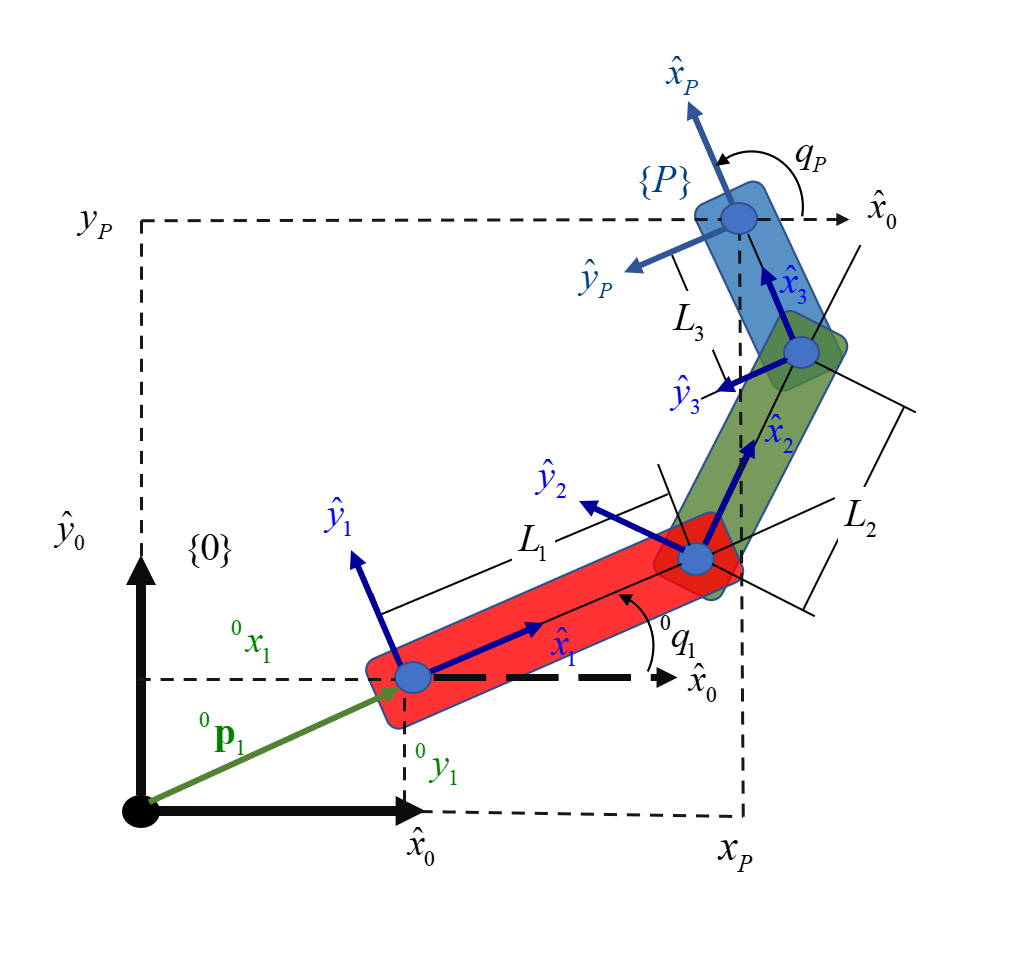


Para el desarrollo del modelo cinemático del robot tipo SCARA, resulta necesario representar matemáticamente el movimiento de un punto específico de su estructura. En particular, se considera el desplazamiento de un punto denominado **P**, correspondiente al extremo de la cadena cinemática.


Con este propósito, se asigna un sistema de referencia a cada una de las juntas que conforman la cadena cinemática, dado que en dichos puntos se producen las rotaciones de los eslabones. El eje **x** de cada sistema de referencia se orienta hacia la siguiente junta con el fin de simplificar los cálculos. Asimismo, se establece un sistema de referencia de origen que no se encuentra asociado a ninguna junta.


Bajo estas consideraciones, es posible construir las matrices de transformación que representan la rotación y posición de cada sistema de referencia, y por ende, de cada junta y del punto **P**. Cada una de estas transformaciones se define como:


In [2]:
%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)


Al haber rotación entre los sistemas de referencia solo en el eje z


$${\textrm{gi}}_j ={\textrm{bi}}_j =0$$

Y por lo tanto las matrices de transformación para cada junta son las siguientes:


$$^0 T_1$$

In [3]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1 x_O_P y_O_P theta_O_P

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)


$$^1 T_2$$

In [4]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)


$$^2 T_3$$

In [5]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)


$$^3 T_P$$

In [6]:
T_3_P = Tij(L_3,0,0,0,0,0)


Para referenciar los movimientos del punto **P** al sistema de referencia de origen es posible:


$$^0 T_P =^0 T_1 ^1 T_2 ^0 T_3 ^3 T_P =\left(\begin{array}{cc} ^0 R_P  & ^0 p_P \newline 0^T  & 1 \end{array}\right)$$

Por lo tanto, la matriz general de transformación es la siguiente


In [7]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


Para el modelo cinemático de postura se propone:


$$F=^o \xi_p -^o \xi_p (q)=0\Longrightarrow ^o \xi_p =^o \xi_p (q)$$

Donde


$$^o \xi_p =\left(\begin{array}{c} ^o x_p \newline ^o y_p \newline ^o {{\theta }}_p  \end{array}\right)$$

$$^o \xi_p (q)=\left(\begin{array}{c} ^o p_P \newline ^o {{\theta }}_P  \end{array}\right)$$

Este vector representa la posición y orientación del punto **P** con respecto a un sistema de referencia de origen, en función de los ángulos entre los eslabones y la longitud de cada uno de ellos. En este sentido, las entradas del modelo corresponden al vector **q**, que contiene los tres ángulos de los eslabones, mientras que las salidas son la posición del punto **P** en los ejes **x** y **y**, así como su inclinación respecto al sistema de referencia de origen.



In [8]:
xi=[x_O_P;y_O_P;theta_O_P]

In [9]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

## Descripción del experimento

Se realizará la propuesta y programación de una trayectoria curva de perfil quintico y deformación senoidal transversal. Consideramos esta trayectoria conveniente para un robot SCARA debido a la combinación de un perfil de interpolación quíntico con una curvatura espacial suave, lo que garantiza movimientos continuos en posición. Asimismo, si en un futuro se deseara analizar la velocidad y la aceleración, con el perfil seleccionado se garantizaría igualmente dicha continuidad. Además, con la trayectoria propuesta se reducirían el desgaste mecánico y las vibraciones en el sistema.


**Perfil de interpolación quíntico:**

\matlabheadingthree{
$$s(t)=10{\left(\frac{t}{T}\right)}^3 -15{\left(\frac{t}{T}\right)}^4 +6{\left(\frac{t}{T}\right)}^5$$ }

*Donde*:

-  $t$ : Tiempo actual
-  $T$ : Ttiempo total de la trayectoria
-  $s(t)$ : Perfil quíntico

**Interpolación espacial en x:**

####
$$x(t)=x_0 +s(t)\cdot (x_f -x_0 )$$
\matlabheadingthree{
$$x(t)=x_{\textrm{in}} +s(t)\cdot (x_{\textrm{fin}} -x_{\textrm{in}} )$$}

**Interpolación espacial en y con ondulación:**

####
$$y(t)=y_0 +s(t)\cdot (y_f -y_0 )+A\cdot \sin (2\pi \cdot s(t))$$

*Donde*:

-  $x_0 ,y_0$ : Coordenadas iniciales
-  $x_f ,y_f$ : Coordenadas finales
-  $\theta_0 ,\theta f$ : Orientación inicial y final
-  $A$ : Amplitud de la onduclación senoidal
-  $s(t)$ : Perfil quíntico


Como parte del experimento, se realizará la solución de la cinemática para hallar los valores angulares de las juntas del robot a través de la trayectoria. Asimismo, con el valor angular de la junta dos en el tiempo, podremos encontrar el índice de manipulabilidad, el cual evalúa la capacidad de un robot para moverse y orientarse de manera eficiente en una configuración articular específica.

\matlabheadingthree{
$$W=\frac{L_1 L_2 \sin (\theta_2 )}{L_1 L_2 }$$}

*Donde*:

-  $L_1$ : Longitud del primer eslabón
-  $L_2$ : Longitud del segundo eslabón
-  $W$ : Índice de manipulabilidad
-  $\theta_2$ : Ángulo de la junta dos

Posterior al análisis del índice de manipulanilidad, se realizará la vizualición en *RViz* del robot SCARA. Se programará el perfil seleccionado y se demostrará como dicho robot realiza el recorrido dentro del vizualizador.


Se presentarán las gráficas resultantes de cada apartado, así como la demostración del movimiento y la visualización.

#### Propuesta y programación de trayectoria

En la gráfica siguiente se representa la trayectoria seguida por el punto de interés en el plano XY, considerando como origen el sistema de referencia asociado al robot SCARA. Las dimensiones de los eslabones L1, L2 y L3 corresponden a las distancias entre las articulaciones del robot, obtenidas directamente a partir del modelo URDF desarrollado.


Las coordenadas de inicio y de destino para la trayectoria fueron seleccionadas en los puntos (0.2, 0.8) y (1.1, \-0.1), respectivamente. Es importante destacar que, en la componente Y de la trayectoria, se definió un índice de amplitud de ondulación senoidal A con un valor de 0.25, lo cual genera un desplazamiento de tipo sinusoidal: comenzando con un ascenso, seguido de un rápido descenso y finalizando con un movimiento ascendente antes de alcanzar el punto de destino.


Con el propósito de mejorar la calidad de la simulación y garantizar un desplazamiento más uniforme y suave, se estableció que la trayectoria se ejecute en un intervalo de 10 segundos, utilizando incrementos temporales de 0.1 segundos.



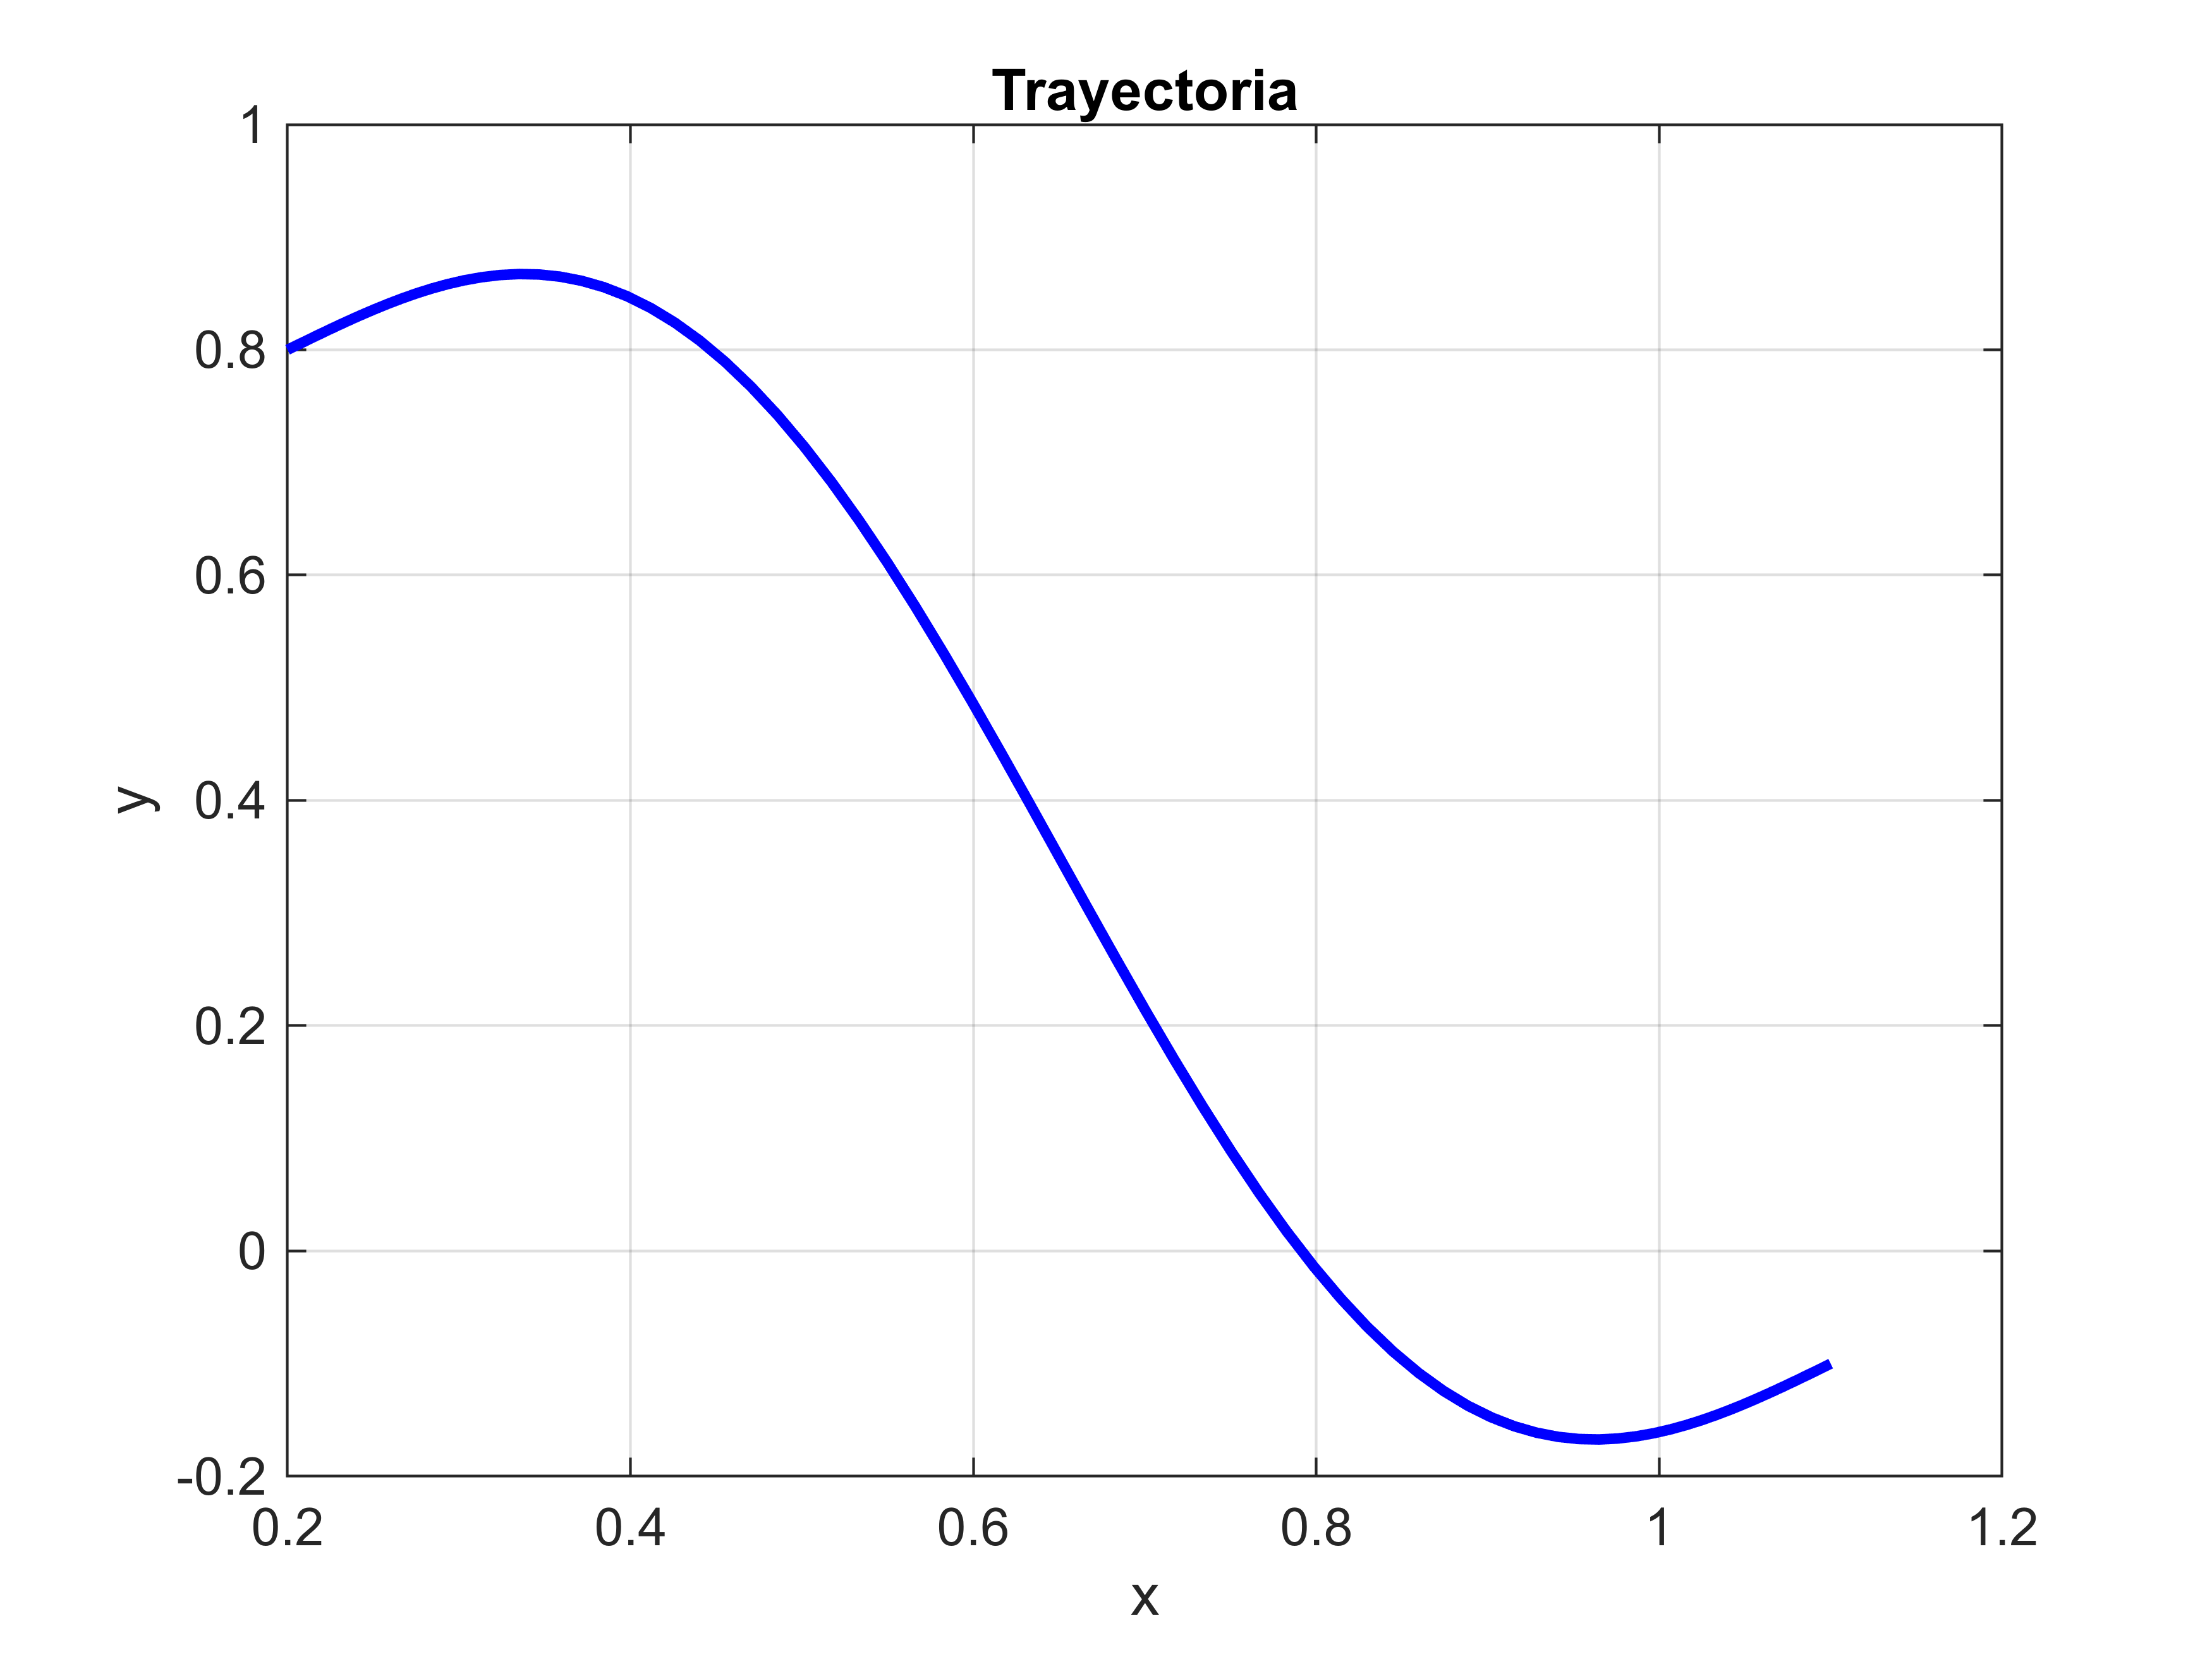

In [10]:
% Parametros del robot
L1 = 0.45;
L2 = 0.45;
L3 = 0.25;

%Punto inicial
x_in = 0.2;
y_in = 0.8;

%Punto final
x_fin = 1.1;
y_fin = -0.1;

%Definición de los parámetros de la trayectoria
t_total = 10;%s
t_in = 0.1; %S
t_sim = 0:t_in:t_total;
theta_P_1 = 0;
theta_P_2 = 0;

%Puntos de la trayectoria
s = 10*(t_sim/t_total).^3 - 15*(t_sim/t_total).^4 + 6*(t_sim/t_total).^5;

% Trayectoria
xp = x_in + s * (x_fin - x_in);
yp = y_in + s * (y_fin - y_in) + 0.25 * sin(2*pi*s); % ondulación curva en y
theta_P = theta_P_1 + s * (theta_P_2 - theta_P_1); % orientación suavizada

plot(xp, yp, 'b', 'LineWidth', 2)
grid on
title('Trayectoria')
xlabel('x')
ylabel('y')

## Solución de la cinemática

A partir de dos coordenadas $\left(x_p ,y_p \right)$ y un ángulo $\theta_P$ , correspondientes a la postura del punto de interés ubicado en el extremo del tercer eslabón y referidas al sistema de coordenadas de origen, es necesario determinar los ángulos que deben adoptar los eslabones del robot para alcanzar la postura indicada.


Dado que el punto de interés comparte la misma postura que el tercer eslabón $L_3$ , se procede a eliminar el efecto de este eslabón sobre la posición final. Para ello, se calcula la proyección de la longitud de $L_3$ en función del ángulo $\theta_P$ �, mediante la expresión: $x_3 =x_p -L_3 \cdot \cos (\theta_P )$


De esta manera, se obtiene la posición de la articulación intermedia entre el segundo y el tercer eslabón, definida por las coordenadas $\left(x_3 ,y_3 \right)$ .


Posteriormente, para determinar el ángulo $\theta_2$ entre el primer eslabón $L_1$ y el segundo eslabón $L_2$ , se aplica la Ley de los Cosenos, considerando como lados de un triángulo los eslabones $L_1$ , $L_2$ y la distancia entre el origen y la posición de la articulación intermedia calculada previamente. La expresión correspondiente es: $\theta_2 =\cos^{-1} \left(\frac{x_3^2 +y_3^2 -L_1^2 -L_2^2 }{2L_1 L_2 }\right)$


Para determinar el ángulo $\theta_1$ , comprendido entre el eje de referencia y el primer eslabón $L_1$ , se emplean dos ángulos auxiliares: el primero, β corresponde al ángulo entre el vector posición $\left(x_3 ,y_3 \right)$ y el eje horizontal, calculado mediante: $\beta =\tan^{-1} \left(\frac{y_3 }{x_3 }\right)$


El segundo ángulo auxiliar, ψ, se obtiene también a partir de la Ley de los Cosenos, considerando como lados el eslabón $L_1$ , la distancia al punto $\left(x_3 ,y_3 \right)$ y el eslabón $L_2$ , a través de: $\psi =\cos^{-1} \left(\frac{x_3^2 +y_3^2 +L_1^2 -L_2^2 }{2L_1 \sqrt{x_3^2 +y_3^2 }}\right)$


El valor de $\theta_1$ se determina como la suma de estos dos ángulos auxiliares: $\theta_1 =\beta +\psi$


Dado que el ángulo $\theta_P$ representa la orientación final del punto de interés, que a su vez es resultado de la composición de los ángulos generados por las articulaciones, es posible despejar el ángulo $\theta_3$ entre los eslabones $L_2$ y $L_3$ mediante: $\theta_3 =\theta_P -\theta_1 -\theta_2$


Este procedimiento debe repetirse para cada instante i de la trayectoria, representado por una estructura de control *For*. Adicionalmente, en cada instante se puede calcular el índice $W$ asociado a $\theta_2$ , considerando que este ángulo es el más crítico para asegurar la continuidad y suavidad de la trayectoria generada.


In [11]:

for i=1:length(t_sim)
    % Solución de la cinematica inversa de la postura del robot

    x3 = xp(i) - L3*cos(theta_P(i));
    y3 = yp(i) - L3*sin(theta_P(i));

    theta2(i) = acos((x3^2+y3^2-L1^2-L2^2)/(2*L1*L2));

    beta = atan2(y3, x3);

    psi = acos((x3^2+y3^2+L1^2-L2^2)/(2*L1*sqrt(x3^2+y3^2)));

    theta1(i) = beta + psi;

    theta3(i) = theta_P(i) - theta1(i) - theta2(i);
    % calculo de w[i]

    w(i) = abs(sin(theta2(i)));

end


## Resultados\-gráficas
#### **Gráfica de la trayectoria articular de las juntas**

En la gráfica siguiente se presentan los valores angulares, expresados en radianes, que cada eslabón del robot debe adoptar para lograr que el punto de interés siga la trayectoria previamente establecida. Estos resultados son producto del análisis de cinemática inversa realizado sobre el modelo.


Se observa que ninguna de las articulaciones experimenta variaciones súbitas en su posición, y aunque los valores angulares no se puede considerar que se mantienen constantes, los cambios entre ellos son progresivos y de baja velocidad, lo cual favorece la estabilidad del movimiento.



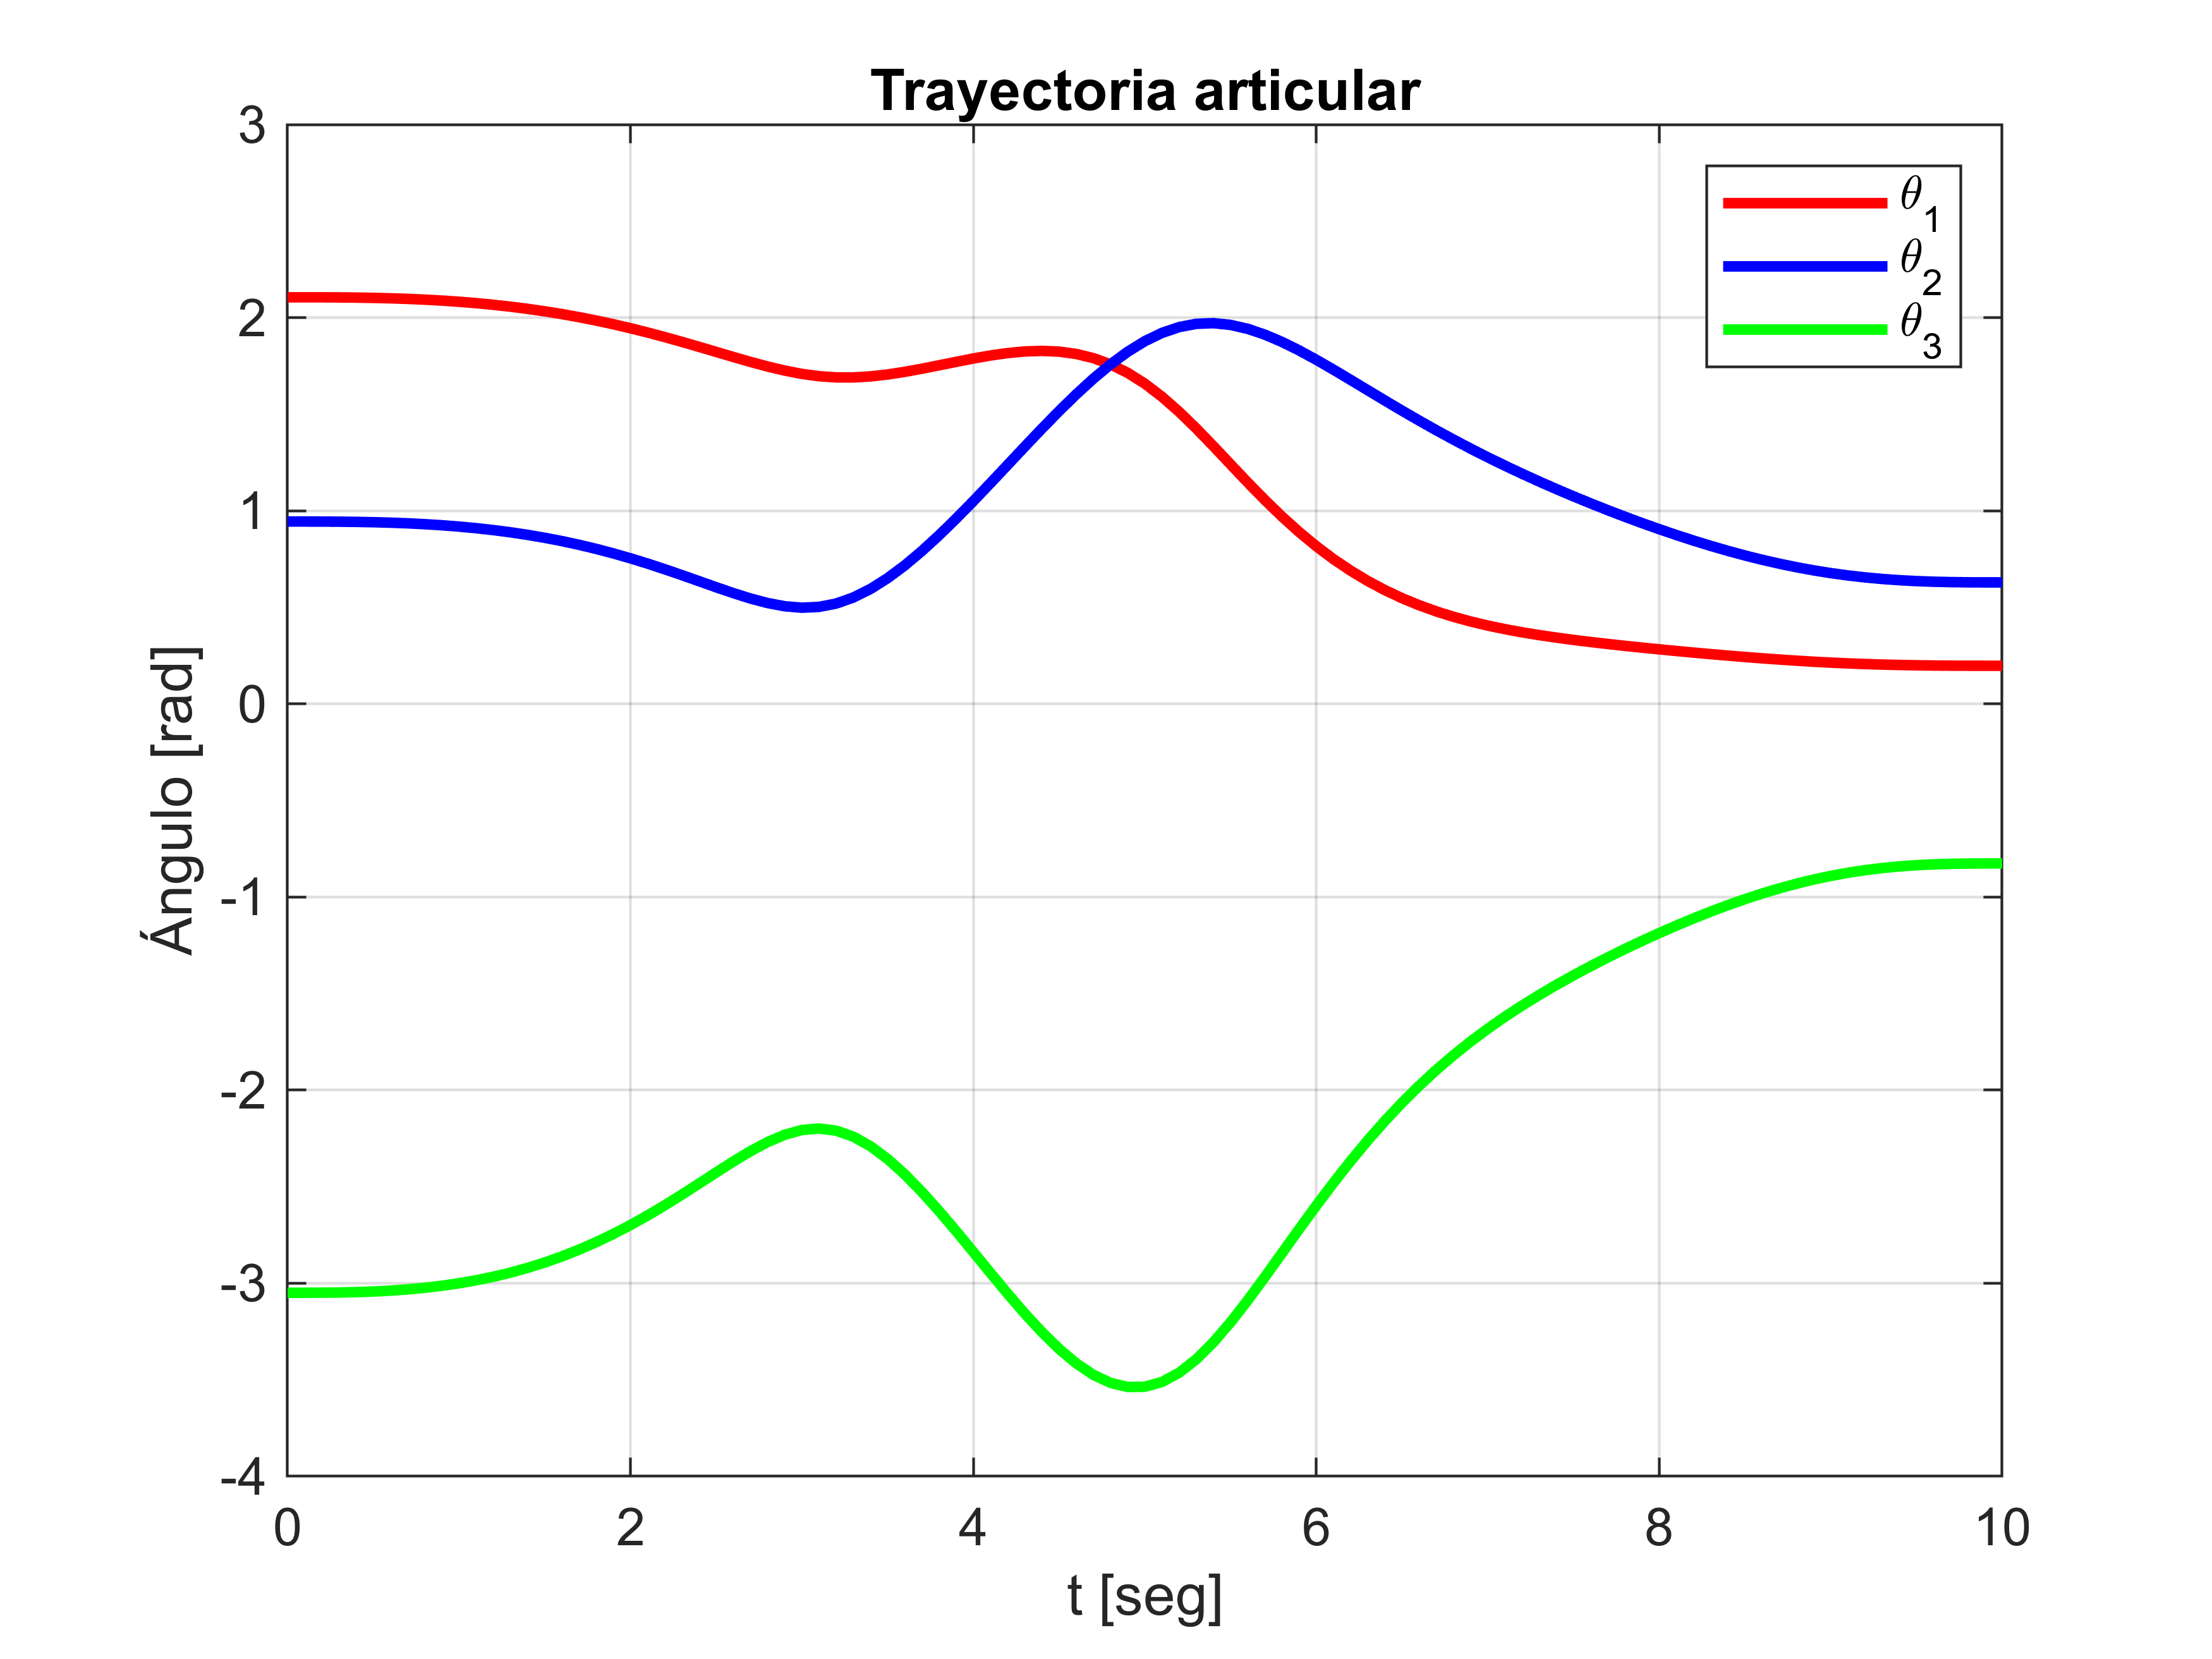

In [12]:
plot(t_sim, theta1, 'r', ...     % curva roja
     t_sim, theta2, 'b', ...     % curva azul
     t_sim, theta3, 'g'Rk2tep0r8, 'LineWidth', 2)         % curva verde
grid on
title('Trayectoria articular')
xlabel('t [seg]')
ylabel('Ángulo [rad]')
legend('\theta_1', '\theta_2', '\theta_3')  % leyenda para identificar cada curva


A continuación, se muestra la gráfica correspondiente a la primera derivada de las posiciones angulares, es decir, a las velocidades angulares de cada eslabón.


De esta representación se concluye que, en términos generales, las velocidades alcanzadas por los eslabones se mantienen relativamente bajas, con valores inferiores a 1 radian por segundo (equivalentes a aproximadamente 60°/s). La única excepción se presenta en el tercer eslabón, el cual supera mínimamente esta magnitud.



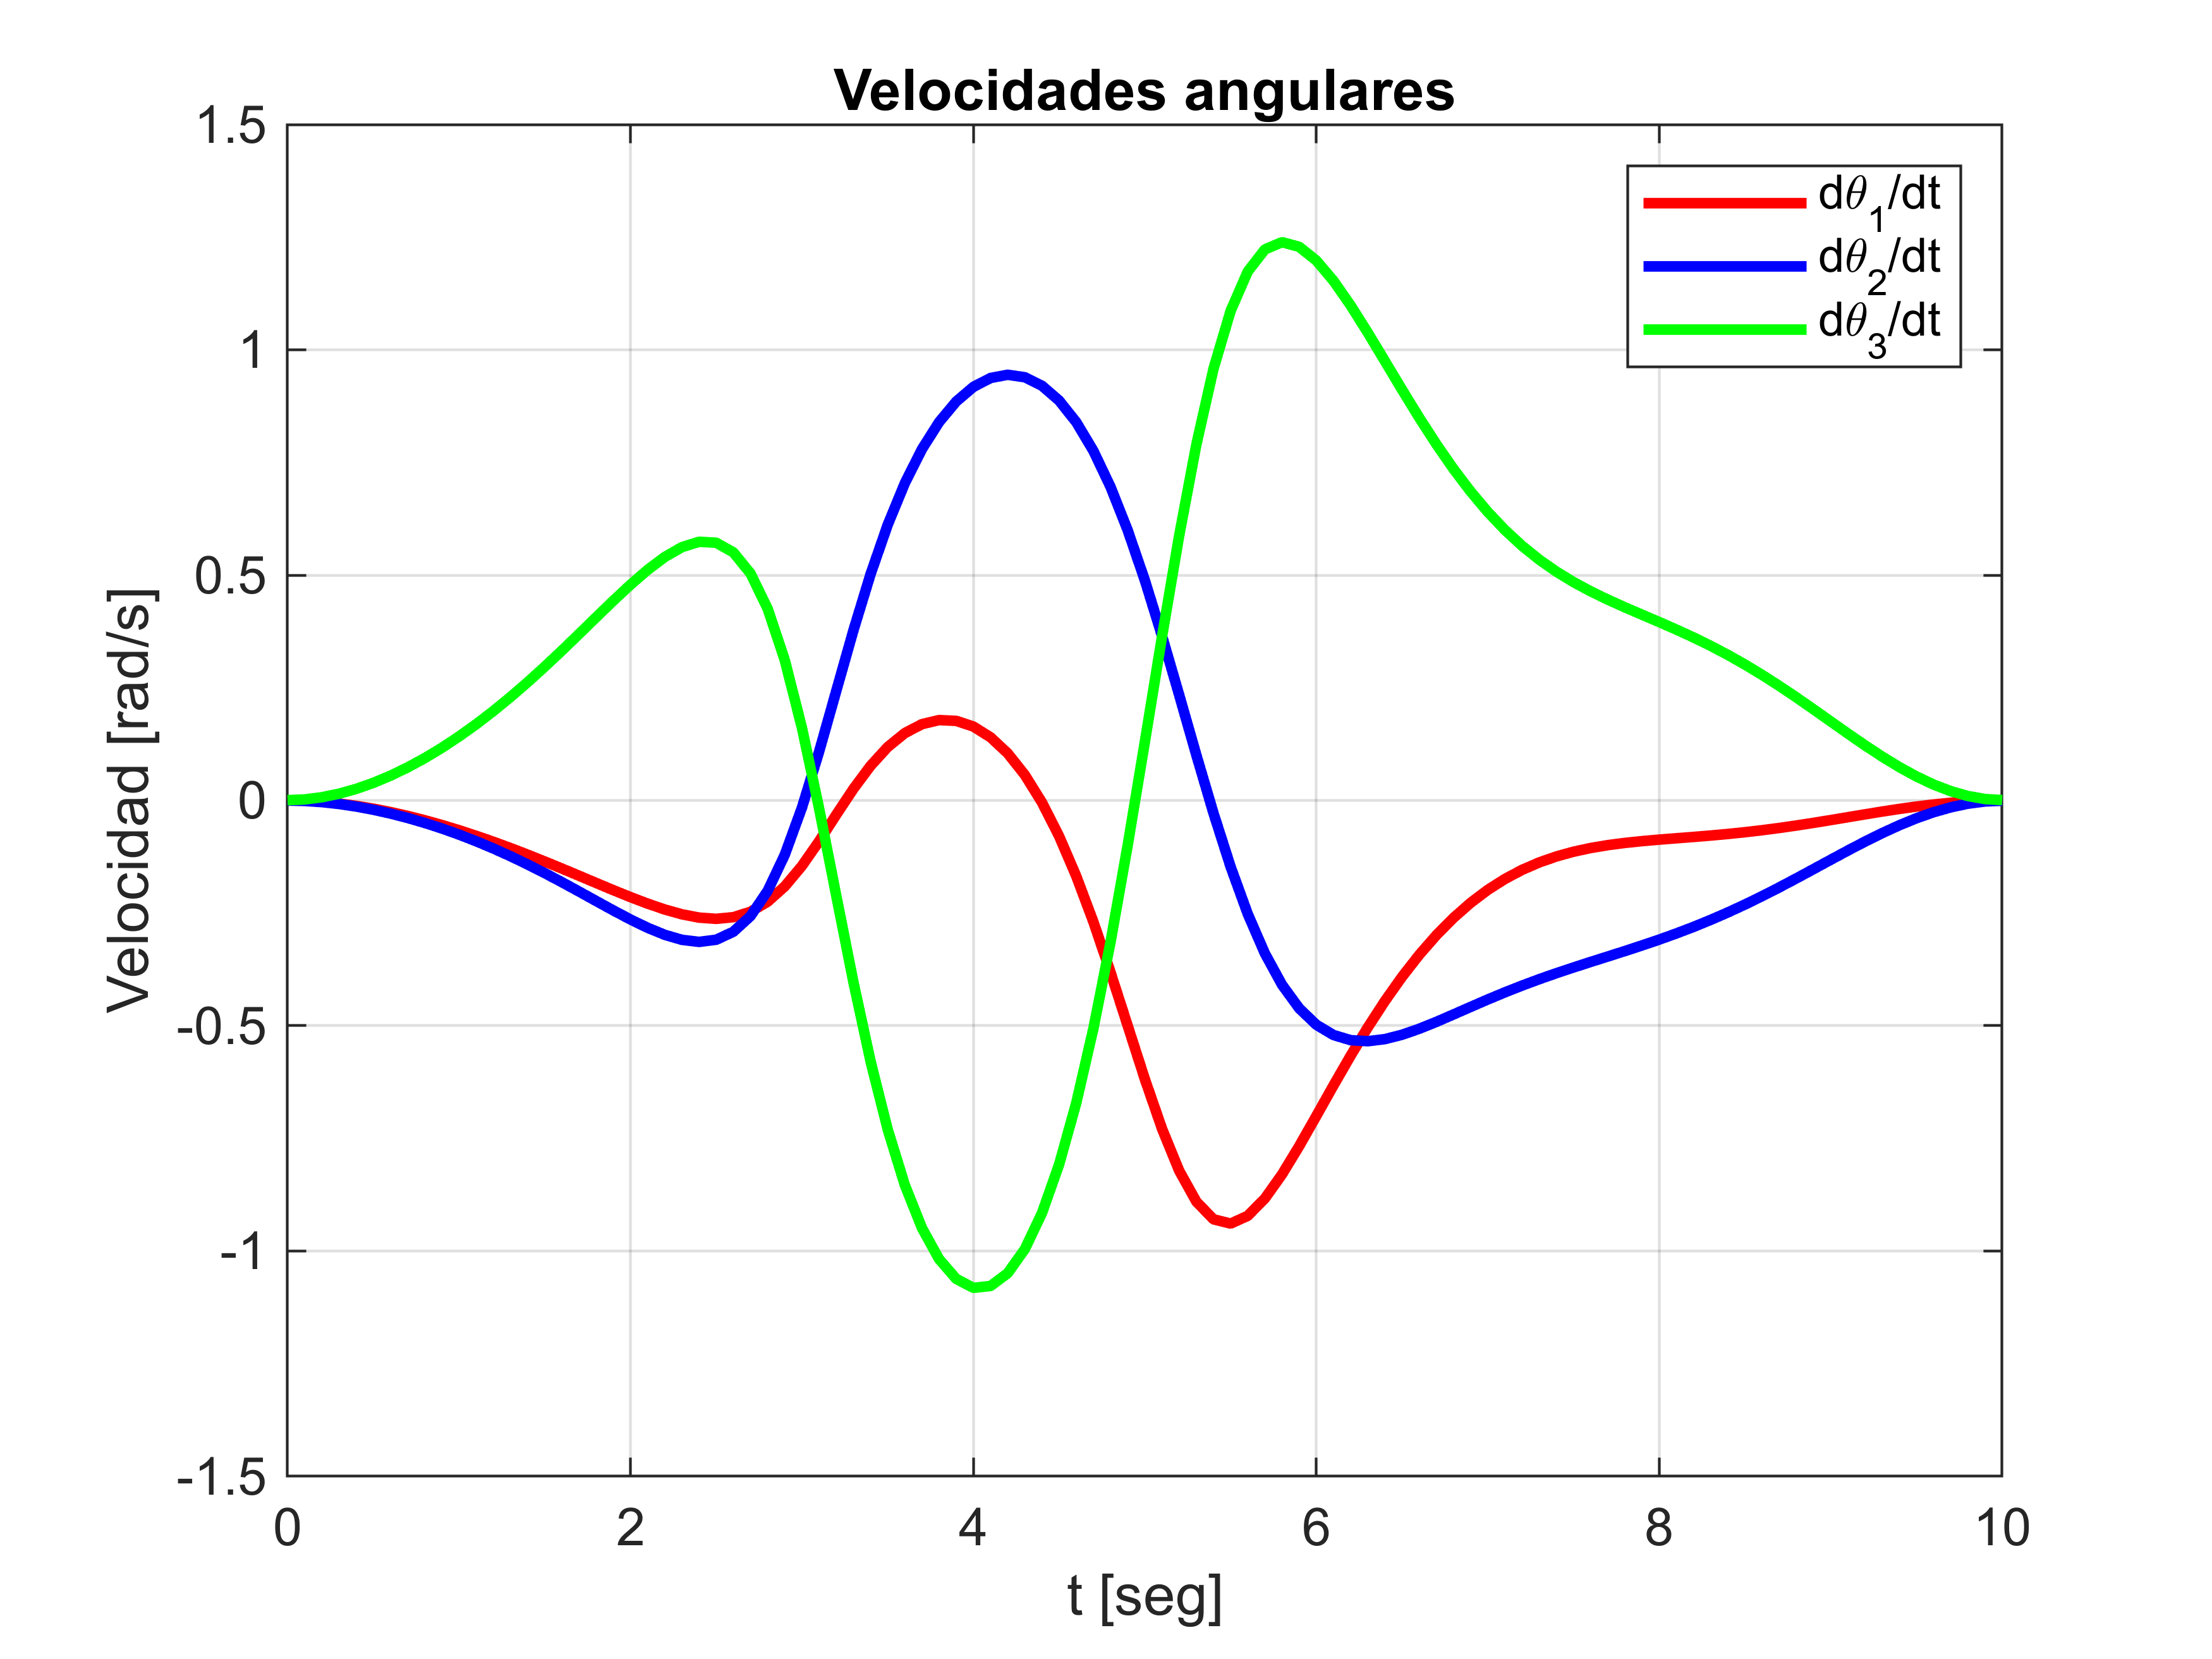

In [13]:
dt = t_sim(2) - t_sim(1);

% Primera derivada (velocidades angulares)
dtheta1 = gradient(theta1, dt);
dtheta2 = gradient(theta2, dt);
dtheta3 = gradient(theta3, dt);

% Grafica velocidades angulares
plot(t_sim, dtheta1, 'r', t_sim, dtheta2, 'b', t_sim, dtheta3, 'g', 'LineWidth', 2)
grid on
title('Velocidades angulares')
xlabel('t [seg]')
ylabel('Velocidad [rad/s]')
legend('d\theta_1/dt', 'd\theta_2/dt', 'd\theta_3/dt')


Posteriormente, se presenta la gráfica de la segunda derivada de las posiciones angulares, correspondiente a las aceleraciones angulares de cada eslabón.


En esta gráfica se aprecia la presencia de aceleraciones elevadas, así como cambios abruptos en su magnitud, principalmente en el eslabón 3. Este comportamiento podría comprometer la integridad estructural o funcional de los motores encargados de accionar dicho eslabón, por lo que resulta un aspecto crítico a considerar en el diseño del robot y de sus trayectorias.



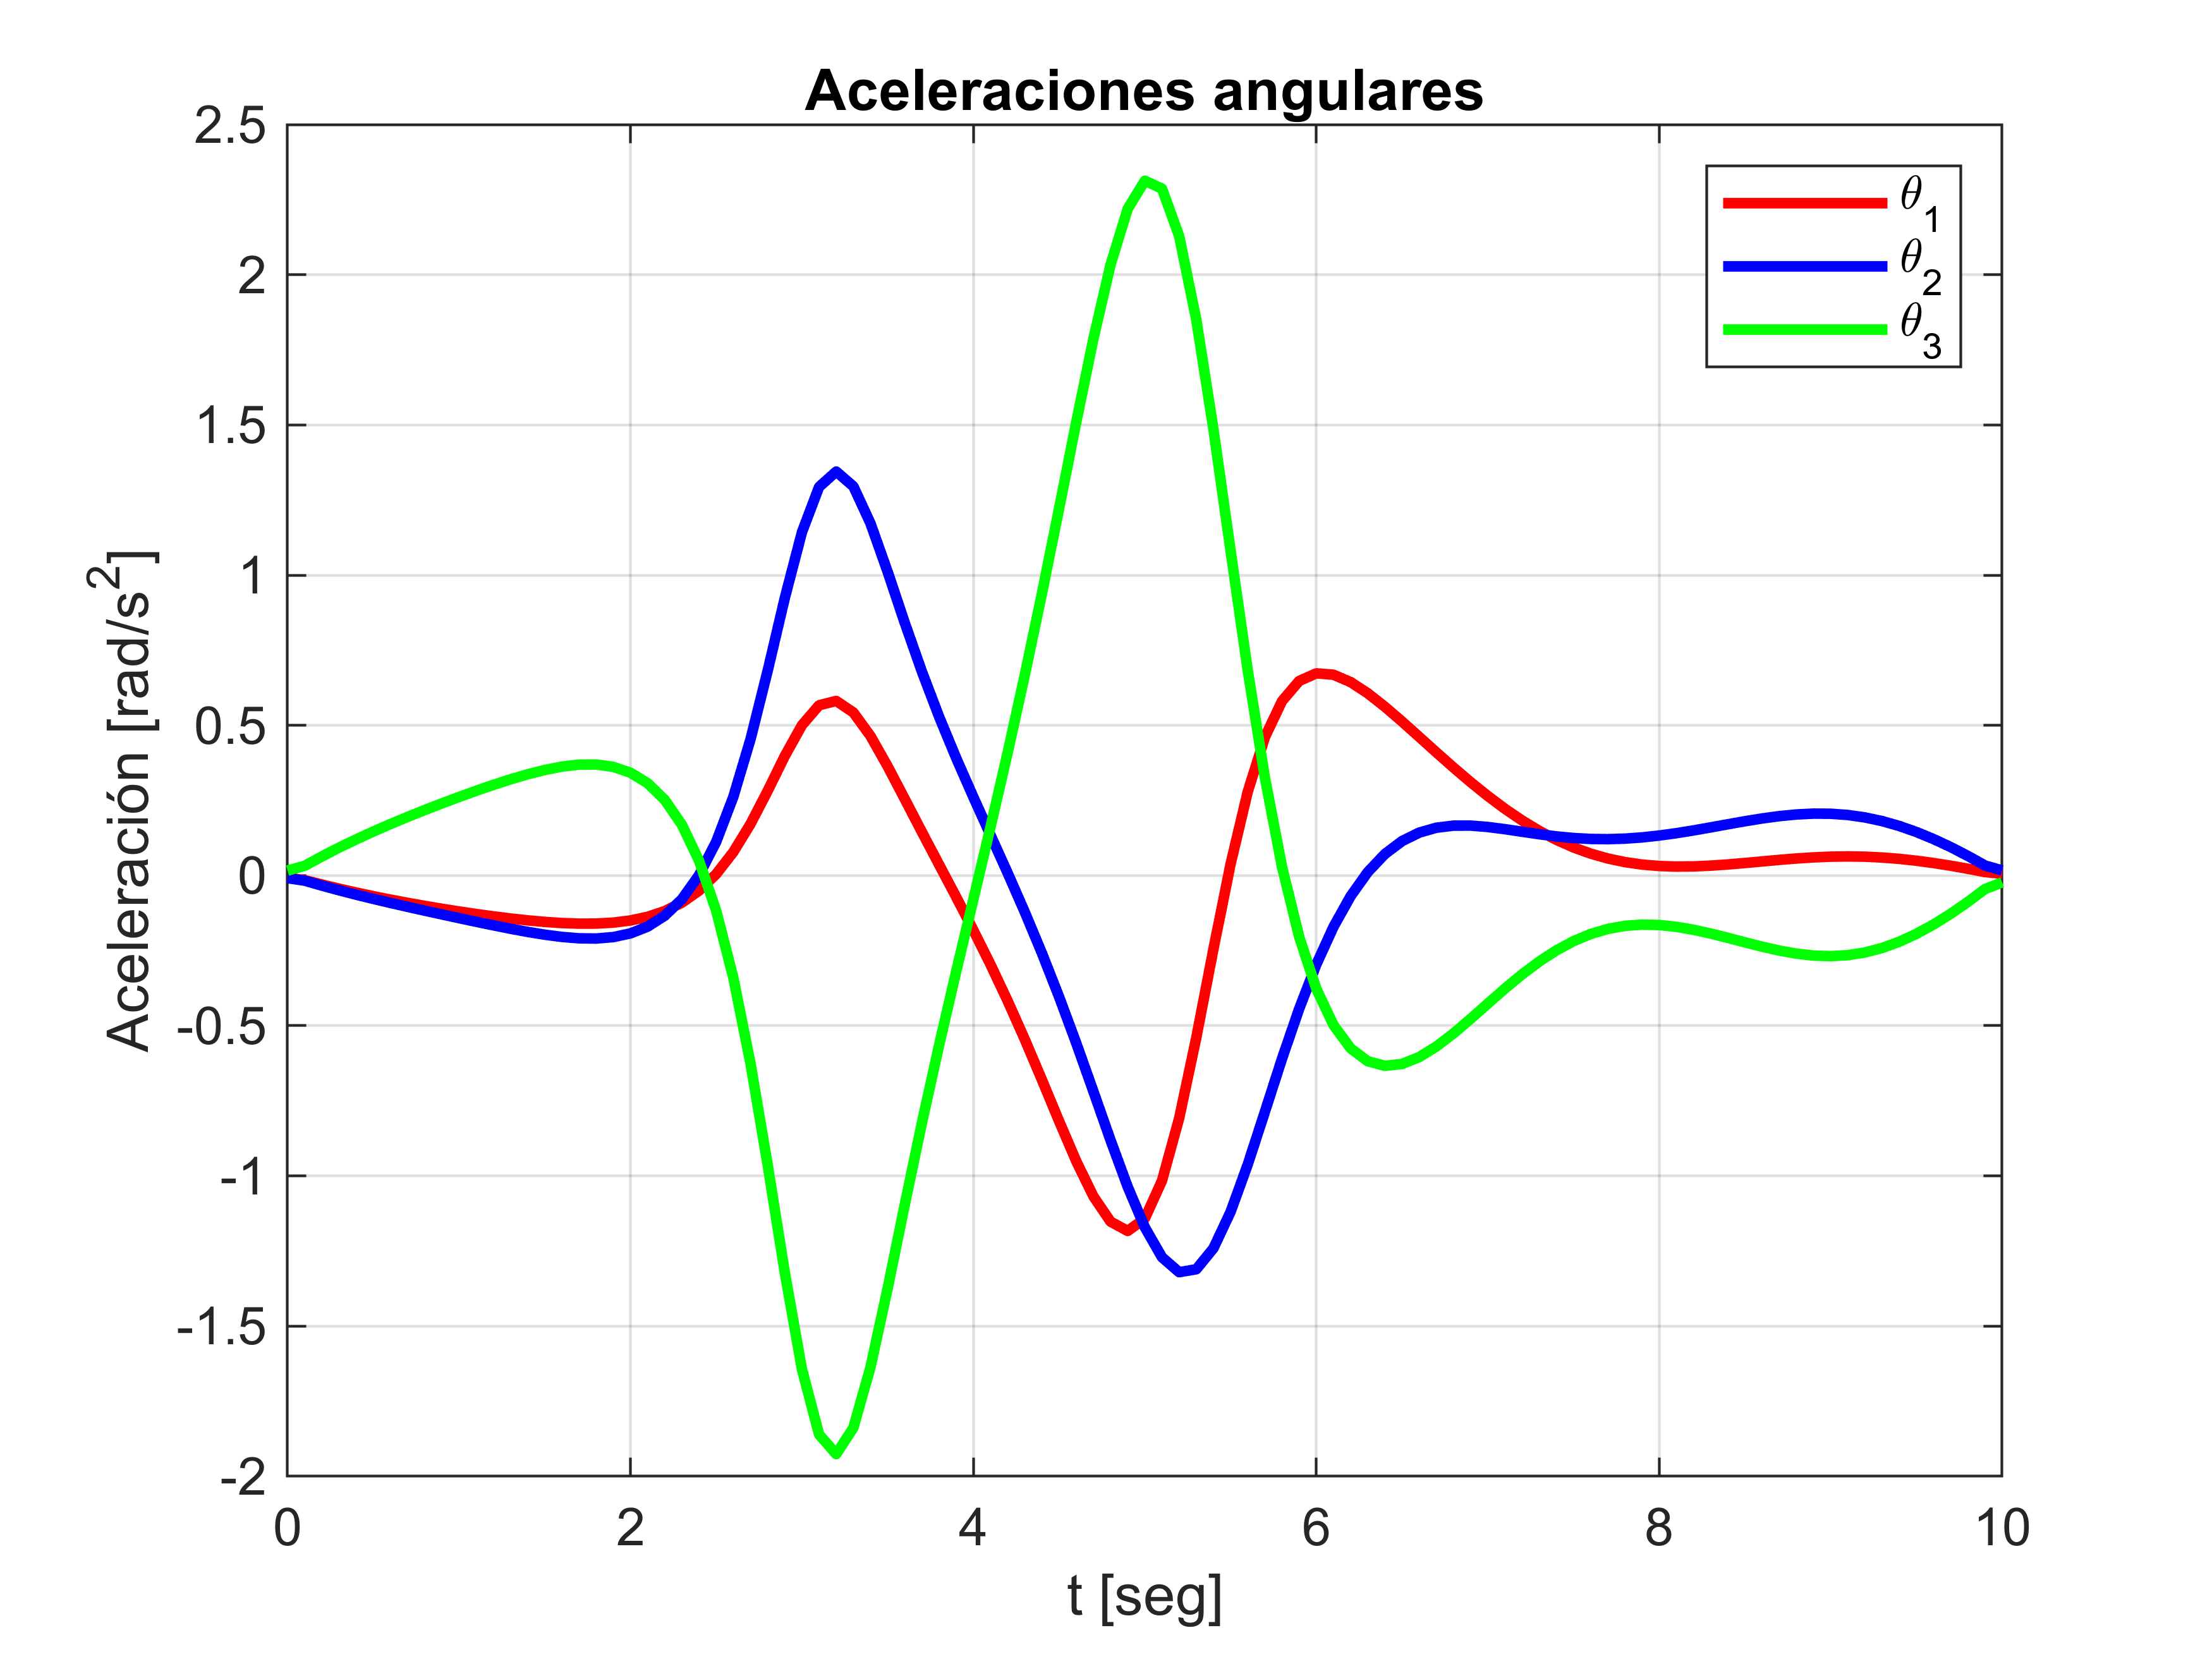

In [14]:
% Segunda derivada (aceleraciones angulares)
ddtheta1 = gradient(dtheta1, dt);
ddtheta2 = gradient(dtheta2, dt);
ddtheta3 = gradient(dtheta3, dt);

% Grafica aceleraciones angulares
plot(t_sim, ddtheta1, 'r', t_sim, ddtheta2, 'b', t_sim, ddtheta3, 'g', 'LineWidth', 2)
grid on
title('Aceleraciones angulares')
xlabel('t [seg]')
ylabel('Aceleración [rad/s^2]')
legend('d^2\theta_1/dt^2', 'd^2\theta_2/dt^2', 'd^2\theta_3/dt^2')
legend('\theta_1', '\theta_2', '\theta_3')  % leyenda para identificar cada curva

#### **Gráfica del índice de manipulabilidad a través de la trayectoria**

En la gráfica se muestra el índice de manipulabilidad W para el eslabón 2, considerado el componente más sensible del sistema durante la trayectoria.


A partir de esta gráfica se puede identificar que los puntos críticos de aceleración angular en el eslabón 2 coinciden con reducciones súbitas en su índice de manipulabilidad. Asimismo, se observa que los instantes en los cuales las aceleraciones son nulas corresponden a valores de manipulabilidad cercanos a 1. Este comportamiento permite concluir que, para mantener un índice de manipulabilidad adecuado a lo largo de la trayectoria, es recomendable conservar las aceleraciones angulares próximas a cero y, en caso de ser necesario, procurar que sus variaciones se mantengan lo más constantes posible.



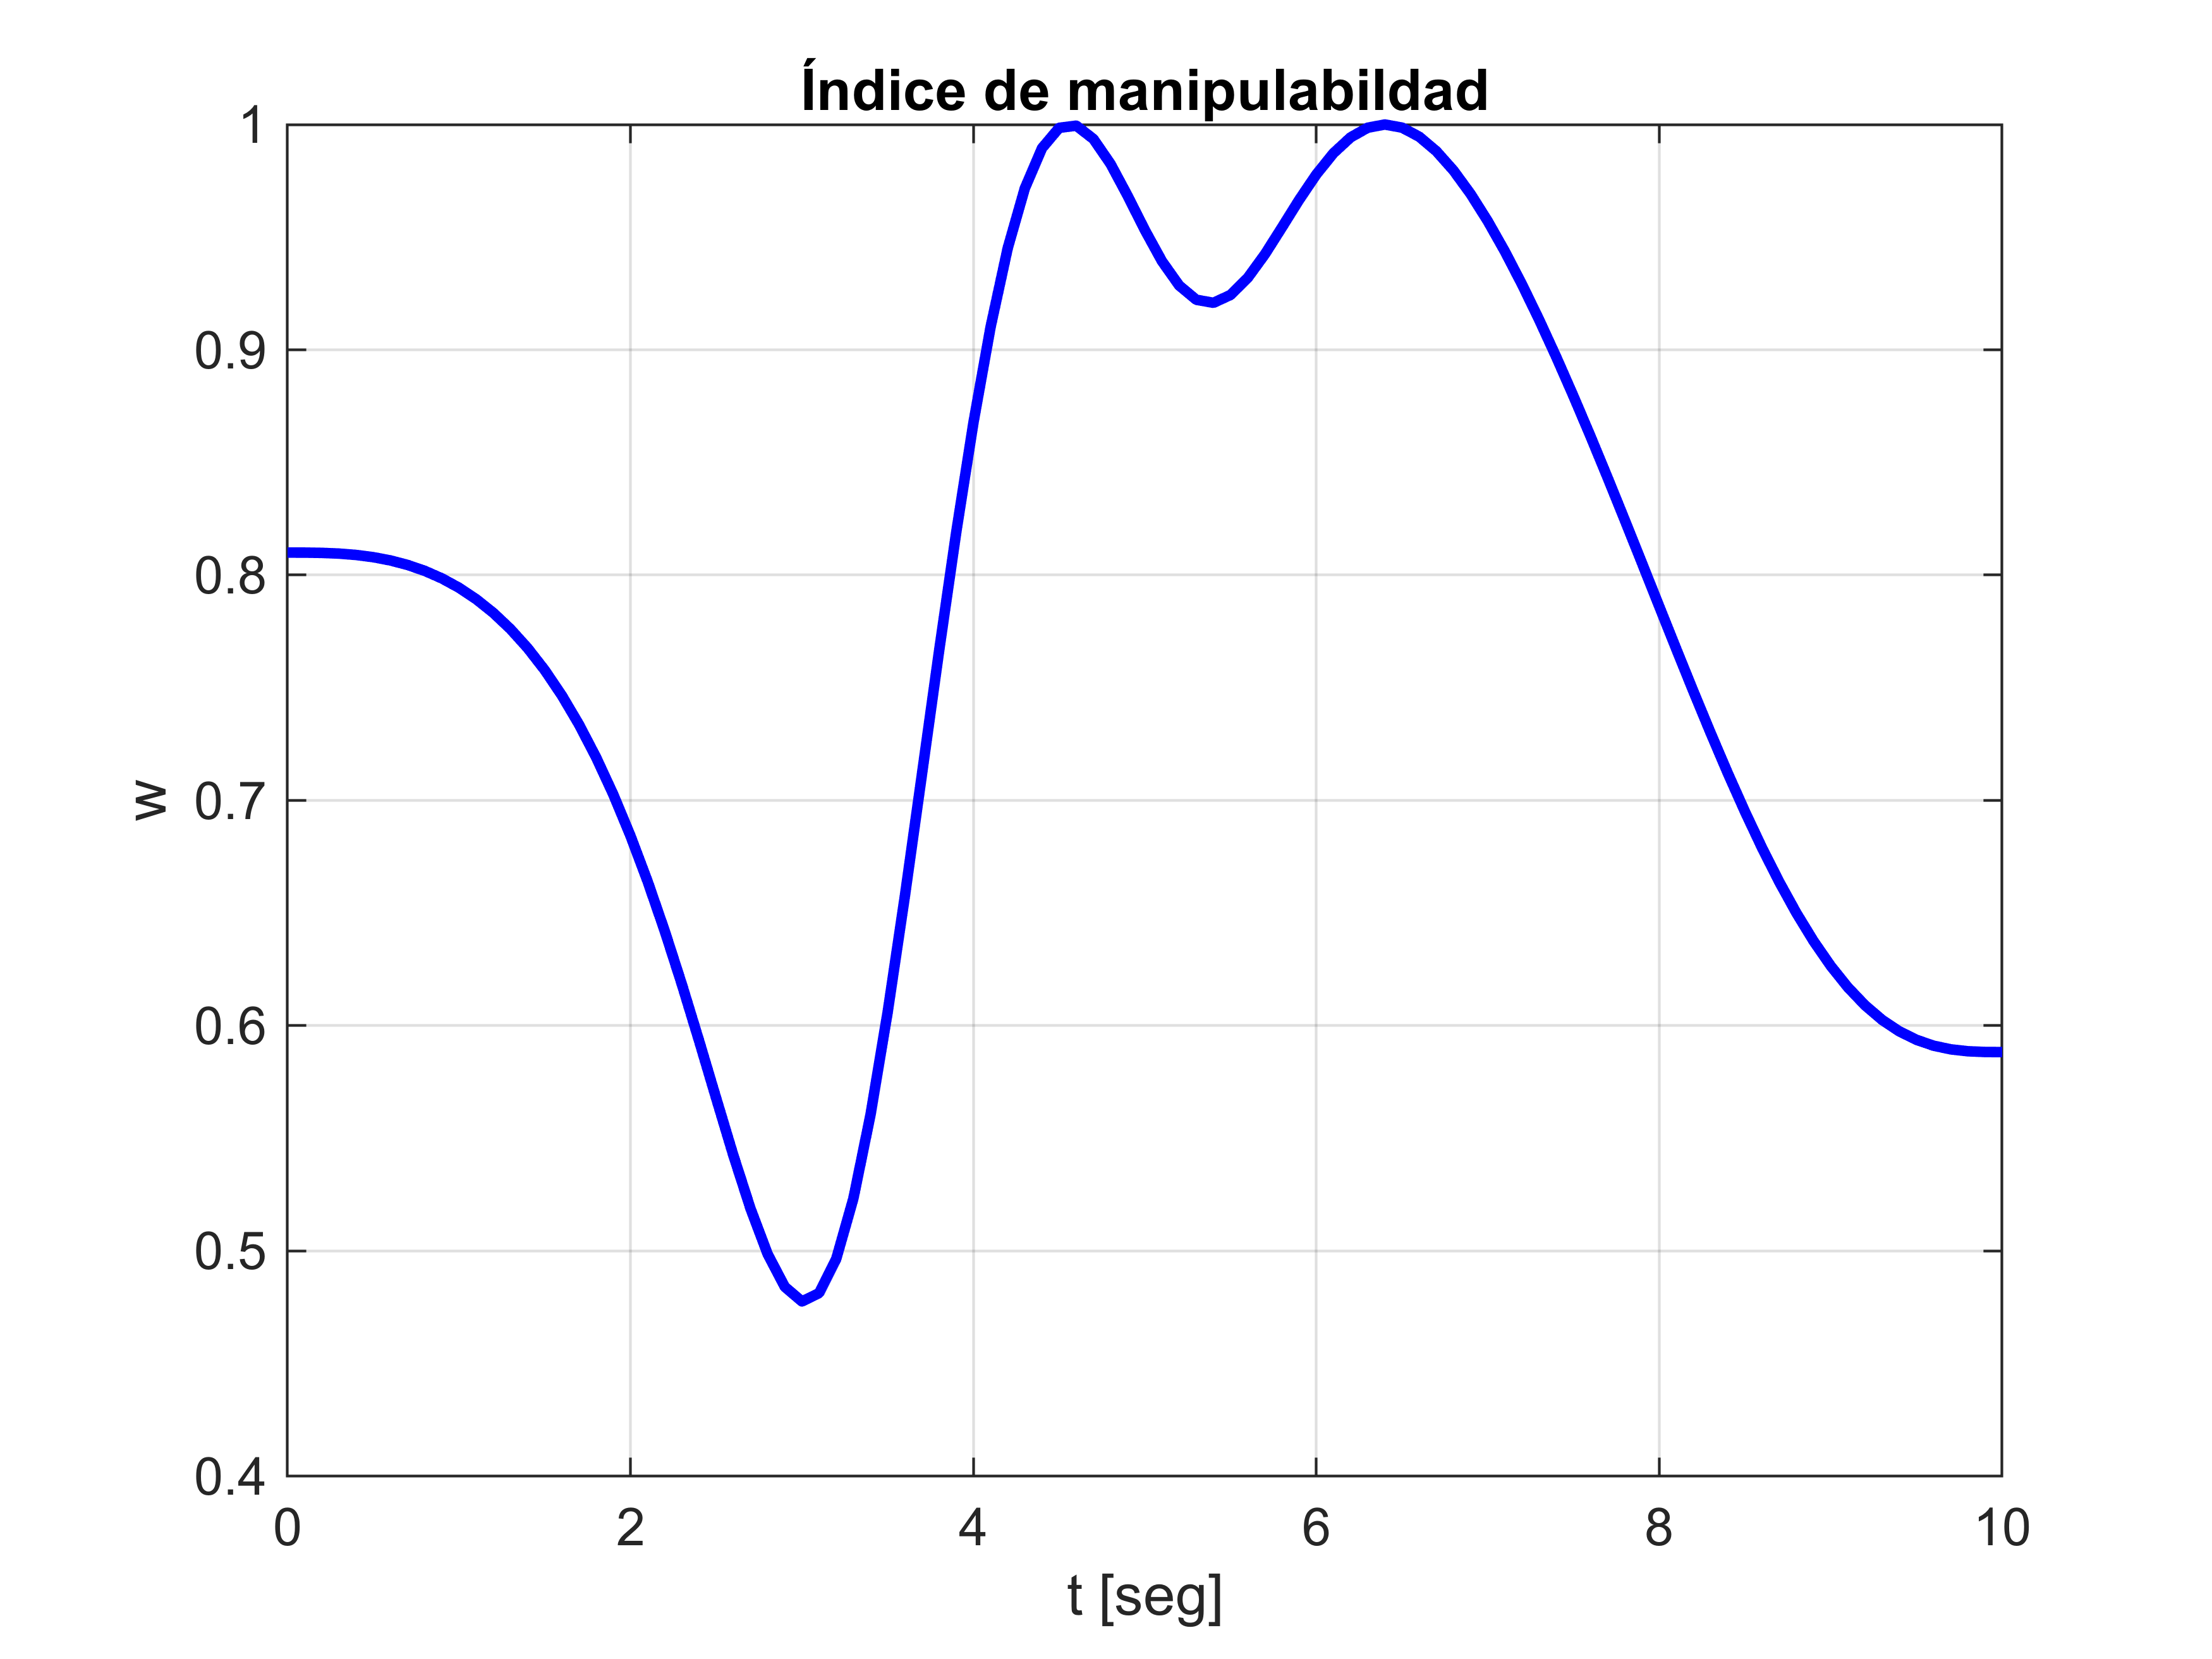

In [15]:
plot(t_sim, w,'b', 'LineWidth', 2)
grid on
title('Índice de manipulabildad')
xlabel('t [seg]')
ylabel('w')

## Resultados - Visualización

#### Visualización del archivo URDF en RVIZ

Para poder demostrar la trayectoria propuesta, es necesario observar el funcionamiento de nuestro modelo SCARA en RViz (visualizador). Dicha visualización y simulación de la trayectoria funcionará de la siguiente manera:

1. Se visualizará el modelo URDF del SCARA propuesto en RViz. Esto se logrará a través de la ejecución de un archivo tipo *launcher*, donde se encontrarán las características (configuraciones) del visualizador. De igual forma, en el lanzador se especifica el archivo URDF a modelar dentro de RViz, así como el controlador que se encargará de recibir la información para el cambio de $\theta_1$, $\theta_2$ y $\theta_3$, y de esta forma se logre apreciar la trayectoria desde una vista ortogonal superior.

2. Una vez se haya logrado la visualización, se realizará la ejecución del nodo encargado de publicar los valores en grados de las juntas, es decir, publicará los valores de $\theta_1$, $\theta_2$ y $\theta_3$ en el tópico `/scara_trajectory_controller/joint_trajectory`.

3. Del tópico `/scara_trajectory_controller/joint_trajectory`, el controlador leerá la información y realizará el movimiento indicado.

4. Se realizarán ajustes manuales en caso de haber omitido algo en la configuración leída por RViz o, si es la primera vez, se guardará una nueva configuración con los cambios realizados manualmente.

   
#### Modelo URDF visualizado en RVIZ
Se muestra el modelo del robot SCARA, donde el eslabón rojo representa a $L_1$, el eslabón verde representa a $L_2$ y el eslabón azul a $L_3$. Al extremo de $L_3$ se encuentra el punto $P$. Dicho punto $P$ condicionará a los eslabones, definiendo el recorrido en el espacio establecido por el nodo. 

<center>
    <img src="Captura de pantalla 2025-05-28 151006.png" alt="Modelo URDF" style="width: 60%;"/>
    <br>
    Figura 1: Visualización del modelo URDF en RVIZ.
</center>

#### Código del nodo que publicará los valores angulares
El código mostrado a continuación es de suma importancia, debido a que es el nodo responsable de publicar los valores en `/scara_trajectory_controller/joint_trajectory`. Por ello, es en este nodo donde debe realizarse la programación del perfil quíntico que define nuestra trayectoria.

<pre><code>
<span style="color:#999988">#!/usr/bin/env python3</span>

<span style="color:#0000FF">import</span> rclpy
<span style="color:#0000FF">from</span> rclpy.node <span style="color:#0000FF">import</span> Node
<span style="color:#0000FF">from</span> trajectory_msgs.msg <span style="color:#0000FF">import</span> JointTrajectory, JointTrajectoryPoint
<span style="color:#0000FF">from</span> builtin_interfaces.msg <span style="color:#0000FF">import</span> Duration

<span style="color:#0000FF">from</span> math <span style="color:#0000FF">import</span> cos, sin, acos, atan2, sqrt

<span style="color:#22863a">class</span> <span style="color:#6f42c1">ScaraTrayLineNode</span>(Node):
    <span style="color:#22863a">def</span> <span style="color:#6f42c1">__init__</span>(self):
        <span style="color:#0000FF">super()</span>.__init__(<span style="color:#032f62">"scara_tray_line_node"</span>)
        topic_name = <span style="color:#032f62">"/scara_trajectory_controller/joint_trajectory"</span>
        self.joints_ = [<span style="color:#032f62">'link_1_joint'</span>, <span style="color:#032f62">'link_2_joint'</span>, <span style="color:#032f62">'link_3_joint'</span>]
        self.lamda_ = <span style="color:#005cc5">0</span>
        self.Tiempo_ejec_ = <span style="color:#005cc5">10</span>

        self.scara_tray_pub_ = self.create_publisher(
            JointTrajectory, topic_name, <span style="color:#005cc5">10</span>)
        self.tray_timer_ = self.create_timer(
            <span style="color:#005cc5">0.1</span>, self.trayectory_cbck)
        self.get_logger().info(
            <span style="color:#032f62">'SCARA activo, trayectoria propuesta'</span>)

    <span style="color:#22863a">def</span> <span style="color:#6f42c1">trayectory_cbck</span>(self):
        <span style="color:#22863a">if</span> self.lamda_ &lt;= self.Tiempo_ejec_:
            trayectory_msg = JointTrajectory()
            trayectory_msg.joint_names = self.joints_
            point = JointTrajectoryPoint()

            x_1 = <span style="color:#005cc5">0.2</span>
            y_1 = <span style="color:#005cc5">0.8</span>
            theta_1 = <span style="color:#005cc5">0</span>
            x_2 = <span style="color:#005cc5">1.1</span>
            y_2 = <span style="color:#005cc5">-0.1</span>
            theta_2 = <span style="color:#005cc5">0</span>

            solucion = invk_sol(self.lamda_, x_1, y_1, theta_1, x_2, y_2, theta_2, self.Tiempo_ejec_)
            point.positions = solucion
            point.time_from_start = Duration(sec=<span style="color:#0000FF">int</span>(self.lamda_ * <span style="color:#005cc5">0.1</span>))  
            trayectory_msg.points.append(point)

            self.scara_tray_pub_.publish(trayectory_msg)
            self.get_logger().info(f<span style="color:#032f62">"Paso {self.lamda_} → Postura: {solucion}"</span>)

            self.lamda_ += <span style="color:#005cc5">0.1</span>
        <span style="color:#22863a">else</span>:
            self.get_logger().info(<span style="color:#032f62">"Trayectoria completada. Deteniendo temporizador."</span>)
            self.tray_timer_.cancel()

<span style="color:#22863a">def</span> <span style="color:#6f42c1">invk_sol</span>(param, x_in, y_in, theta_in, x_fin, y_fin, theta_fin, Tiempo_ejec_):
    L_1 = <span style="color:#005cc5">0.45</span>
    L_2 = <span style="color:#005cc5">0.45</span>
    L_3 = <span style="color:#005cc5">0.25</span>

    <span style="color:#999988"># Perfil quintico</span>
    s = <span style="color:#005cc5">10</span>*(param/Tiempo_ejec_)**<span style="color:#005cc5">3</span> - <span style="color:#005cc5">15</span>*(param/Tiempo_ejec_)**<span style="color:#005cc5">4</span> + <span style="color:#005cc5">6</span>*(param/Tiempo_ejec_)**<span style="color:#005cc5">5</span>

    x_P = x_in + s * (x_fin - x_in)
    y_P = y_in + s * (y_fin - y_in) + <span style="color:#005cc5">0.25</span>* sin(<span style="color:#005cc5">2</span> * <span style="color:#005cc5">3.14159</span> * s)
    theta_P = theta_in + s * (theta_fin - theta_in)

    x_3 = x_P - L_3 * cos(theta_P)
    y_3 = y_P - L_3 * sin(theta_P)

    <span style="color:#22863a">try</span>:
        theta_2 = acos((x_3**<span style="color:#005cc5">2</span> + y_3**<span style="color:#005cc5">2</span> - L_1**<span style="color:#005cc5">2</span> - L_2**<span style="color:#005cc5">2</span>) / (<span style="color:#005cc5">2</span> * L_1 * L_2))
        beta = atan2(y_3, x_3)
        psi = acos((x_3**<span style="color:#005cc5">2</span> + y_3**<span style="color:#005cc5">2</span> + L_1**<span style="color:#005cc5">2</span> - L_2**<span style="color:#005cc5">2</span>) / (<span style="color:#005cc5">2</span> * L_1 * sqrt(x_3**<span style="color:#005cc5">2</span> + y_3**<span style="color:#005cc5">2</span>)))
        theta_1 = beta - psi
        theta_3 = theta_P - theta_1 - theta_2
        <span style="color:#22863a">return</span> [theta_1, theta_2, theta_3]
    <span style="color:#22863a">except</span> ValueError:
        <span style="color:#22863a">return</span> [<span style="color:#005cc5">0.0</span>, <span style="color:#005cc5">0.0</span>, <span style="color:#005cc5">0.0</span>]

<span style="color:#22863a">def</span> <span style="color:#6f42c1">main</span>(args=None):
    rclpy.init(args=args)
    node = ScaraTrayLineNode()
    rclpy.spin(node)
    rclpy.shutdown()

<span style="color:#22863a">if</span> __name__ == <span style="color:#032f62">"__main__"</span>:
    main()
</code></pre>


## Ejecución de la trayectoria en el visualizador
A continuación se muestra cómo el punto $P$ marca la trayectoria en el espacio en el plano. En la terminal se puede apreciar como el nodo publica los valores de $\theta_1$, $\theta_2$ y $\theta_3$ cada 0.1 segundos, tal como se realizó en la evualuación.
<br>
### Simulación desde vista ortogonal superior
![Animación de ejemplo](1000285021.gif)
[Ver video en YouTube](https://youtu.be/AWEs3KDUtk0?si=R35TeVRDD9Mi4-Ys)
<br>
### Simulación desde otra perspectiva
![Animación de ejemplo](1000285024.gif)
[Ver video en YouTube](https://youtu.be/tZgRQJ7M9ww?si=XvXJDeVSY3Eawl9H)
<br>
<center>
    <img src="Captura de pantalla 2025-05-28 130724.png.png" alt="Modelo URDF" style="width: 30%;"/>
    <br>
    Figura 2: Trayectoria de perfil quíntico propuesto.
</center>
<br><br>

De esta manera, podemos afirmar que el código programado en el nodo es correcto, debido a que el perfil propuesto analíticamente es el mismo que se demuestra en la simulación.

## Conclusión individual

## Bibliografía:
[1] Google, "Gemini 2.0 Flash", *Google Gemini,*2025.[Online].Available:https://gemini.google.com/app?.hl=es. [Accessed: May 27, 2025].

[2] S. A. Alshahrani, H. Diken, and A. A. N. Aljawi, "Optimum Trajectory Function for Minimum Energy Requirements of a Spherical Robot," *Proc. 6th Saudi Engineering Conference*, Dhahran, Saudi Arabia, vol. 4, pp. 613–625, Dec. 2002.
